## Outliers 

#### Oque são Outliers ? 

Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

os outliers podem viesar negativamente todo o resultado de uma análise;
o comportamento dos outliers pode ser justamente o que está sendo procurado.
Os outliers possuem diversos outros nomes, como: dados discrepantes, pontos fora da curva, observações fora do comum, anomalias, valores atípicos, entre outros.

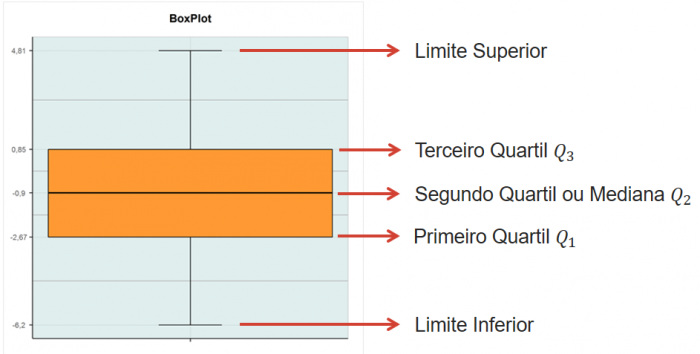

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 
% matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Utilizar apenas uma coluna do dataset para o estudo 

use_cols = ['annual_inc'] 
data = pd.read_csv ('loan.csv', usecols = use_cols, nrows = 30000)
data.head()

,annual_inc
0,55000.0
1,90000.0
2,59280.0
3,92000.0
4,57250.0


## Detectar Outliers

Algumas técnicas muito efetivas para detecção de outliers. 


<html> <hr> 
 ------------------------------------------------------------------------------------------------------------------------------------

### Análise de Valor Extremo 

<html> A forma mais básica de detecção externa é a análise de valor extremo. A chave deste método é determinar as caudas estatísticas da distribuição subjacente da variável e encontrar os valores no extremo extremo das caudas.
No caso de uma distribuição gaussiana, os outliers ficarão fora da média mais ou menos 3 vezes o desvio padrão da variável.

Se a variável não é normalmente distribuída (não é uma distribuição gaussiana), uma abordagem geral é calcular os quantis e, em seguida, a faixa inter-quartil.

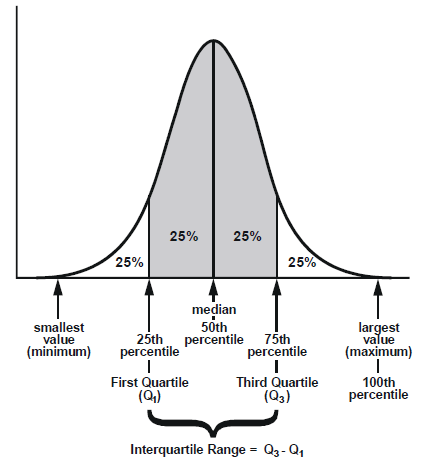

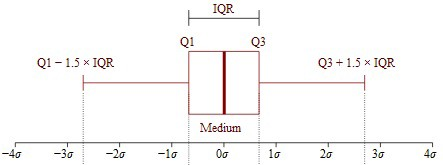

In [3]:
# Primeiro é calcular o Intevalor inter quartil chamado de IQR 

# Calculando intervalo entre quartis: 3º e 1º quartil 
IQR = data.annual_inc.quantile (0.75) - data.annual_inc.quantile (0.25) 

# Um outlier estará nos seguintes limites superior e inferior.
# Limite extremo é multiplicado por 3 para identificar outliers em um distribuição normal.

upper_limit = data.annual_inc.quantile (0.75) + (IQR * 1.5)
upper_limit_extreme = data.annual_inc.quantile (0.75) + (IQR * 3)


upper_limit, upper_limit_extreme

(178000.0, 256000.0)

In [4]:
# Ver a proporção de ponto de dados acima do limite superior e superior extremo 

# Total de linhas 
total = np.float(data.shape[0])

# total da amostra  
print('Total de devedores: {}'.format(data.annual_inc.shape[0] / total))

# Proporção de valores acima (Outliers)
print('Mutuários que ganham acima de 178K: {}'.format(data[data.annual_inc> 178000].shape[0] / total))
print('Mutuários que ganham acima de 256K: {}'.format(data[data.annual_inc> 256000].shape[0] / total))

Total de devedores: 1.0
Mutuários que ganham acima de 178K: 0.05433333333333333
Mutuários que ganham acima de 256K: 0.0162


* Cerca de 5% dos dados estão com valores acima de 178K
* 1% dos dados com valores extremos acima de 256K 

<html> <hr> 

### Score Z 
<hr>
<html> Um sscore Z (ou escore padrão) representa quantos desvios padrão uma determinada medida se desvia da média. Em outras palavras, apenas redimensiona ou padroniza seus dados. Um escore Z serve para especificar a localização precisa de cada observação em uma distribuição. O sinal do escore Z (+ ou -) indica se o escore está acima (+) ou abaixo (-) da média.
O objetivo de obter escores Z é remover os efeitos do local e da escala dos dados, permitindo comparar diferentes conjuntos de dados diretamente. A intuição por trás do método Z-score de detecção de valores extremos é que, uma vez centralizados e redimensionados os dados, qualquer coisa que esteja muito longe de zero (o limiar é geralmente um Z-score de 3 ou -3) deve ser considerada uma ponto fora da curva.
A fórmula para calcular a pontuação Z é: 

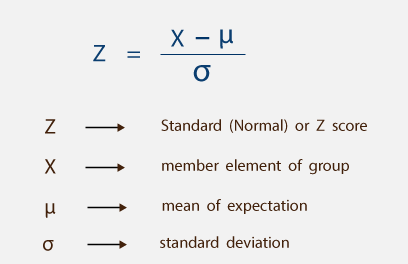

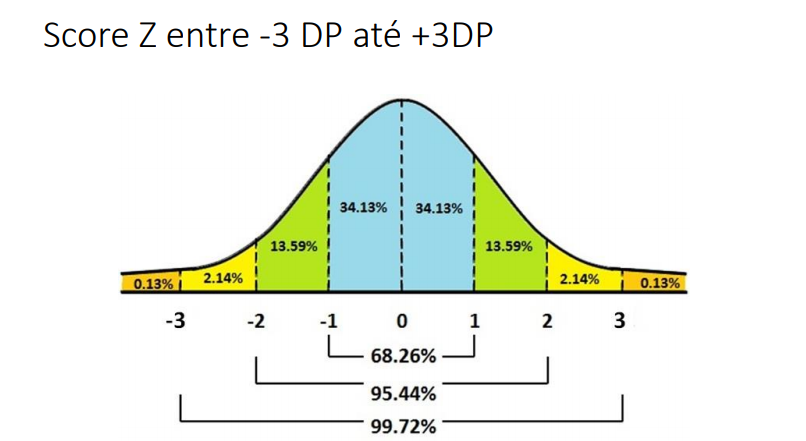

In [5]:
# Biblioteca Scipy para trabalhar com Score-Z 

from scipy import stats 

In [6]:
# Calculando Score-Z 

z = stats.zscore(data)
z

array([[-0.3040589 ],
       [ 0.06618657],
       [-0.25878317],
       ...,
       [ 0.12965722],
       [ 1.22981519],
       [-0.19827448]])

In [7]:
# Localizando Outliers abaixo do minímo 

threshold = -3 
print(np.where(z<-3))

(array([], dtype=int64), array([], dtype=int64))


In [8]:
# Localizando acima do máximo Outliers 

threshold = 3 
print(np.where(z>3))

(array([   55,   127,   215,   453,   503,   512,   644,   680,  1059,
        1631,  1803,  2078,  2341,  2508,  2582,  2688,  2689,  2739,
        2967,  3069,  3122,  3272,  3523,  3558,  3565,  3784,  4711,
        4731,  4849,  4931,  5128,  5211,  5534,  5746,  5889,  5957,
        6044,  6214,  6685,  6745,  6834,  6948,  6984,  6992,  7144,
        7551,  7678,  8063,  8091,  8347,  8355,  8709,  8766,  8883,
        9030,  9267,  9370,  9522,  9699, 10135, 10639, 10665, 10787,
       10994, 11053, 11181, 11381, 11467, 11784, 11786, 11881, 12297,
       12336, 12430, 12909, 12978, 13118, 13231, 13483, 13554, 13677,
       13974, 14119, 14309, 14742, 14894, 15073, 15228, 15383, 15460,
       15991, 16045, 16218, 16291, 16780, 16888, 17290, 17335, 17582,
       17862, 17917, 17998, 18050, 18188, 18436, 18634, 18805, 18907,
       18927, 19040, 19159, 19167, 19547, 19703, 19940, 19962, 19982,
       19984, 20057, 20115, 20173, 20225, 20265, 20593, 20694, 20702,
       20800, 20818

A primeira matriz mostra o número das linhas, e a segunda matriz o número das colunas (neste exemplo estamos utilizando apenas uma coluna e por isso todas são 0) podemos desta forma identificar com Escore-Z Outliers em nossos dados. 

<hr>

### Abordagem gráfica 

gráficos de caixa, histogramas e gráficos de dispersão são usados ​​principalmente para identificar discrepâncias no conjunto de dados.

 * Box Plots
O diagrama de plotagem de caixa, também denominado plotagem de Whisker, é um método gráfico tipicamente representado por quartis e inter-quartis que ajuda a definir o limite superior e o limite inferior além do qual qualquer dado encontrado será considerado outlier.
Em resumo, quantis são pontos em uma distribuição que se relaciona à ordem de classificação dos valores nessa distribuição. Para uma determinada amostra, você pode encontrar qualquer quantil classificando a amostra. O valor médio da amostra classificada é o quantil médio ou o 50º percentil (também conhecido como mediana da amostra).

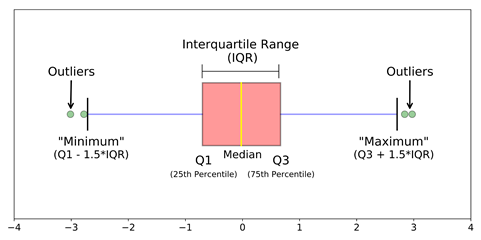

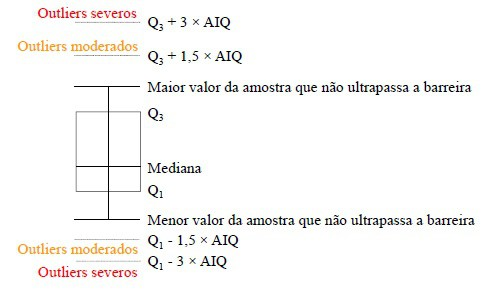

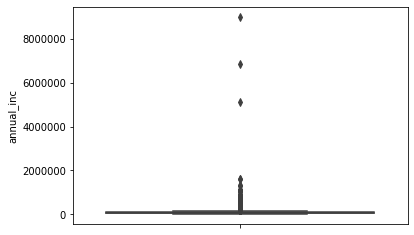

In [9]:
# Boxplot 
sns.boxplot(y='annual_inc', data=data)

Aqui, outliers são observações numericamente distantes do restante dos dados. Ao revisar um boxplot, um outlier é um ponto de dados localizado fora das cercas ("bigodes") do boxplot. 
<hr>

### Histogramas

* Histogramas
Os histogramas são um dos gráficos mais comuns usados ​​para exibir dados numéricos e encontrar a distribuição do conjunto de dados. Um outlier é uma observação que se encontra fora do padrão geral de distribuição.

(0, 500000)

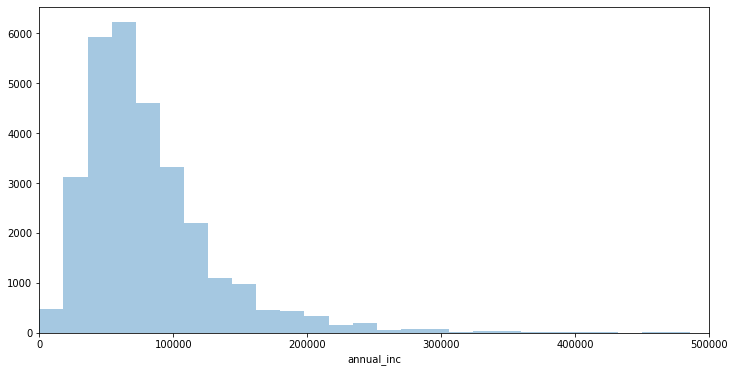

In [10]:
fig, axe = plt.subplots(figsize=(12,6))

fig = sns.distplot(data['annual_inc'], bins=500, kde=False)
fig.set_xlim(0,500000)

Aqui, os pontos de dados na extremidade direita do eixo x podem ser considerados dos valores extremos.

### Dispersão 

Gráficos de dispersão são usados ​​para encontrar a associação entre duas variáveis ​​e essa associação geralmente tem um padrão. Chamamos um ponto de dados de outlier se ele não se encaixa no padrão.

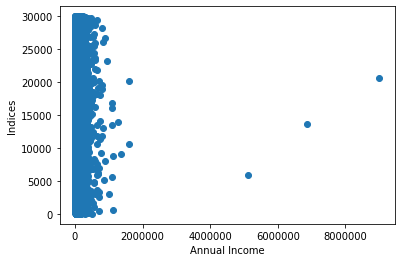

In [11]:
data_raw = data['annual_inc'].values
y = np.arange(0,30000)
plt.scatter(data_raw,  y)
plt.xlabel('Annual Income')
plt.ylabel('Indices')
plt.show()

<hr>
<hr>

### Métodos para pré-processar Outliers 

* 1. Imputação média / mediana ou aleatória
* 2.  Aparar

#### Amostragem Média / Mediana / Aleatória:
Se tivermos motivos para acreditar que os valores discrepantes se devam a erros mecânicos ou problemas durante a medição. Isso significa que os outliers são, por natureza, semelhantes aos dados ausentes, então qualquer método usado para a imputação de dados ausentes pode ser usado para substituir os outliers. O número de outliers é pequeno (caso contrário, eles não serão chamados outliers) e é razoável usar a média / mediana / imputação aleatória para substituí-los.

#### Aparar:
Nesse método, descartamos completamente os outliers. Ou seja, elimine os pontos de dados que são considerados outliers. Em situações em que você não removerá um grande número de valores do conjunto de dados, o corte é uma abordagem boa e rápida.

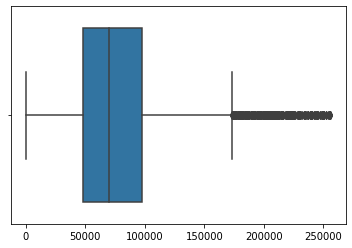

In [12]:
# Definindo os outliers no valor de 256.000 

index = data[data.annual_inc>256000].index
data.drop(index=index, inplace=True) 

# Visualizando resultados 
sns.boxplot(data)

Aqui, usamos o método drop do pandas para remover todos os registros que ultrapassam o valor limite superior encontrado usando a análise de valores extremos. <hr>

### Conclusões: o que fazer com os outliers?


Vimos ao longo deste notebook que é imprescindível dar atenção aos outliers, pois eles podem viesar toda a análise de dados. Porém, além de identificar, o que é preciso fazer para tratar os pontos fora da curva?

Existem diversas saídas, algumas delas são:

excluir as observações discrepantes da amostra de dados: quando o dado discrepante é fruto de um erro de input dos dados, então ele precisa ser removido da amostra;
realizar uma análise separada apenas com os outliers: esta abordagem é útil quando se quer investigar casos extremos, como alunos que só tiram notas boas, empresas que apresentam lucro mesmo em tempos de crise, casos de fraudes, entre outros.
utilizar métodos de clusterização para encontrar uma aproximação que corrige e dá um novo valor aos dados outliers: em casos de erros no input dos dados, ao invés de excluir e perder uma linha inteira de registros devido a uma única observação outlier, uma solução é utilizar algoritmos de clusterização que encontram o comportamento das observações mais próximas ao dado outlier e fazem inferência de qual seria o melhor valor aproximado.

#### Por fim, a principal conclusão sobre os outliers pode ser resumida da seguinte forma: um dado outlier pode ser o que mais atrapalha sua análise, mas também pode ser exatamente aquilo que você está procurando tanto em análise quanto para criar modelos de Machine learning.